
                
## Exploratory Data Analysis and Predictive Modelling on Women_stem_data
                
            
Data Preprocessing
    1. Label Encoding: Converting categorical into numerical data
    2. Scaling/Normalizing the data
Visualization
    1. Principal Component Analysis
    2. Scatter plots
    3. Useful insights
Predictive models
    1. Linear Regression
    2. Mean Squared Error for Linear Regression
Improvement in Predictive models
    1. Lasso Regressin
    2. Mean Squared Error for Lasso Regression
Summary of Result


In [43]:
#initial_code, the code written here will be shown to user, write here initial setup to help user get started.
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


df = pd.read_csv("women-stem.csv")
dfcopy = pd.read_csv("women-stem.csv")
print("\n")
print("Our original dataframe\n")
print(df)



Our original dataframe

    Rank  Major_code                                              Major  \
0      1        2419                              PETROLEUM ENGINEERING   
1      2        2416                     MINING AND MINERAL ENGINEERING   
2      3        2415                          METALLURGICAL ENGINEERING   
3      4        2417          NAVAL ARCHITECTURE AND MARINE ENGINEERING   
4      5        2418                                NUCLEAR ENGINEERING   
5      6        2405                               CHEMICAL ENGINEERING   
6      7        5001                         ASTRONOMY AND ASTROPHYSICS   
7      8        2414                             MECHANICAL ENGINEERING   
8      9        2401                              AEROSPACE ENGINEERING   
9     10        2408                             ELECTRICAL ENGINEERING   
10    11        2407                               COMPUTER ENGINEERING   
11    12        5008                                  MATERIALS SCIENCE   

We are going to try to predict the variable Sharewoman using linear regression. Lets see :)



Our encoded dataframe



    Rank  Major_code  Major  Major_category   Total     Men   Women  \
0      1        2419     67               2    2339    2057     282   
1      2        2416     53               2     756     679      77   
2      3        2415     51               2     856     725     131   
3      4        2417     60               2    1258    1123     135   
4      5        2418     62               2    2573    2200     373   
5      6        2405     11               2   32260   21239   11021   
6      7        5001      4               4    1792     832     960   
7      8        2414     47               2   91227   80320   10907   
8      9        2401      0               2   15058   12953    2105   
9     10        2408     25               2   81527   65511   16016   
10    11        2407     20               2   41542   33258    8284   
11    12        5008     44               2    4279    2949    1330   
12    13        2404      9               2   1495

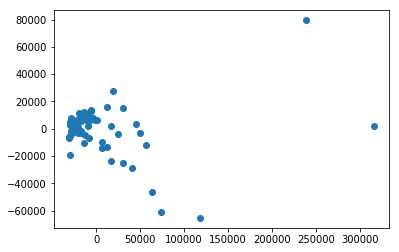

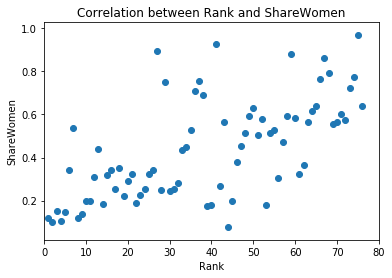

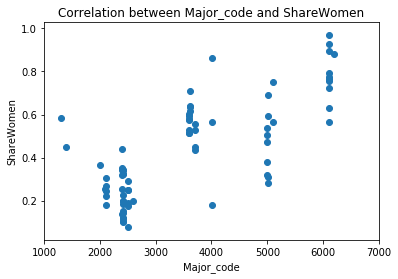

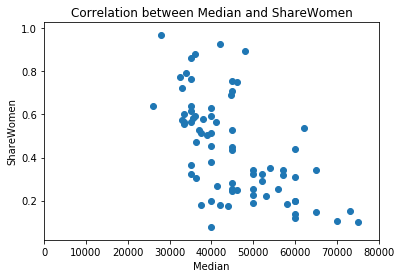

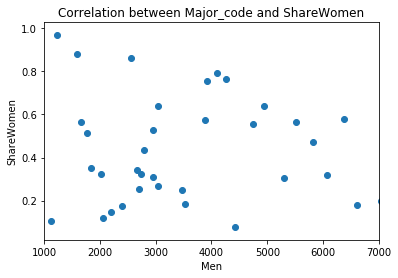



Lets look at some interesting conclusions from the data


The major categories women dominate in numbers are:
Biology and Life science and Health. Expected ?? :)


{'Biology & Life Science': 126, 'Health': 108, 'Engineering': 0, 'Computers & Mathematics': 9, 'Physical Sciences': 54}


Whenever the woman are dominant, 94% of the time the mean salary of that sample is less than the mean of overall mean salary. Huh!



Number of samples where woman dominate and the mean salary is less than overall mean salary (31, 9)
Number of samples where women dominate (33, 9)





Coefficients for all the variables in the linear regression 
 [  2.69079205e-03   8.40873242e-05  -4.71386556e-04  -3.59691690e-02
  -5.05981564e+08   5.05981564e+08   5.05981564e+08  -1.19683878e-06]






MSE error on training part
 0.0143414249569
MSE error on testing part
 0.0200552627639






Now trying Lasso regression. Lets see if it gives us better results! :)






Coefficients for all the variables in the lasso 

In [42]:
#answer, write code which is a solution for above question.
#We wrote an elegant solution to perform label encoding to convert categorical variables into numerical variables
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    

# A function named convert takes dataframe as input and returns a dataframe with encoded numerical values
def convert(data):
    number = preprocessing.LabelEncoder()
    data['Major'] = number.fit_transform(data.Major)
    data['Major_category'] = number.fit_transform(data.Major_category)
    data=data.fillna(-999)
    return data


df = convert(df)

print("\n")
print("Our encoded dataframe\n")
print("\n")
print(df)

# Swap last and second last column for simplicity 
p = df['ShareWomen']
df = df.drop(['ShareWomen'],axis = 1)
df['ShareWomen']=p

print("\n")
print("The co-relation matrix for the dataset showing variable dependence and collinearity\n")
print("\n")

# Printing the co-relation matrix for the all the features/variables in our dataset
print(df.corr())
print("\n")
print("We can say that Major_code and Rank has a positive co-relation with our target variable( Sharewoman)\n")
print("And we can say that Men and Median has a negative co-relation with our target variable( Sharewoman)\n")
print("We are going to visualize the data to see the effect of these co-relations")
print("\n")
# This is how our data is distributed :
# Use PCA transformation to visualize our data in 2 dimensions

print("\n")
print("Visualizing the data using principal component analysis\n")
print("\n")
model = PCA(n_components=2)
model.fit(df)
transformed = model.transform(df)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys)
plt.show()
print("\n")

# Visualizing some variables with Sharewoman and trying to find impact of them on Sharewoman
plt.scatter(df['Rank'],df['ShareWomen'])
plt.xlabel("Rank")
plt.ylabel("ShareWomen")
plt.title("Correlation between Rank and ShareWomen")
plt.xlim(0,80)
plt.show()
print("\n")

plt.xlabel("Major_code")
plt.ylabel("ShareWomen")
plt.title("Correlation between Major_code and ShareWomen")
plt.scatter(df['Major_code'],df['ShareWomen'])
plt.xlim(1000,7000)
plt.show()
print("\n")


plt.xlabel("Median")
plt.ylabel("ShareWomen")
plt.title("Correlation between Median and ShareWomen")
plt.scatter(df['Median'],df['ShareWomen'])
plt.xlim(0,80000)
plt.show()
print("\n")

plt.xlabel("Men")
plt.ylabel("ShareWomen")
plt.title("Correlation between Major_code and ShareWomen")
plt.scatter(df['Men'],df['ShareWomen'])
plt.xlim(1000,7000)
plt.show()
print("\n")


# Lets see in which major categories women dominate in numbers
print("Lets look at some interesting conclusions from the data")
print("\n")
print("The major categories women dominate in numbers are:")
print("Biology and Life science and Health. Expected ?? :)")
print("\n")
df_filtered = dfcopy[dfcopy['ShareWomen'] > 0.5]
majors = ['Engineering', 'Physical Sciences', 'Computers & Mathematics','Health', 'Biology & Life Science']
majorsmap = {}
for major in majors:
    majorsmap[major] = df_filtered[df_filtered['Major_category'] == major].size
print(majorsmap)
print("\n")
print("Whenever the woman are dominant, 94% of the time the mean salary of that sample is less than the mean of overall mean salary. Huh!")
np.mean(dfcopy['Median'])
df_filtered = dfcopy[dfcopy['ShareWomen'] > 0.5]
belowmediansalary = df_filtered[df_filtered['Median'] <  np.mean(dfcopy['Median'])].shape
print("\n")
print("")
print("Number of samples where woman dominate and the mean salary is less than overall mean salary", belowmediansalary)
print("Number of samples where women dominate",df_filtered.shape)
print("\n")

array = df.values
X = array[:,0:8]
Y = array[:,8]
validation_size = 0.20
seed = 12345
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Data preprocessing
# technique: Scaling/ Normalizing the data
steps = [('scaler',StandardScaler()),('lr',LinearRegression())]
pipeline = Pipeline(steps)

df_scaled_train = pipeline.fit(X_train,Y_train)
df_scaled_test = pipeline.fit(X_validation,Y_validation)

stem_model = LinearRegression()
stem_model.fit(X_train,Y_train)
Pred_Test = stem_model.predict(X_validation)
stem_model.score(X_validation,Y_validation)

print("\n\n")
print("Coefficients for all the variables in the linear regression \n",stem_model.coef_)
print("\n\n")

Pred_Train = stem_model.predict(X_train)
MSE_Train = mean_squared_error(Y_train,Pred_Train)
Pred_Test = stem_model.predict(X_validation)
MSE_Test= mean_squared_error(Y_validation,Pred_Test)

print("\n\n")
print("MSE error on training part\n",MSE_Train)
print("MSE error on testing part\n",MSE_Test)
print("\n\n")

print("\n\n")
print("Now trying Lasso regression. Lets see if it gives us better results! :)")
print("\n\n")

lasso = Lasso(alpha=0.5)
lasso_coef = lasso.fit(X,Y).coef_

print("\n\n")
print("Coefficients for all the variables in the lasso regression \n",lasso_coef)
print("\n\n")

df_lasso = df.drop(['Rank','Major','Major_category','Total'],axis = 1)
p = df_lasso['ShareWomen']
df_lasso = df_lasso.drop(['ShareWomen'],axis = 1)
df_lasso['ShareWomen']=p
array = df_lasso.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 12345
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
stem_lasso_model = LinearRegression()
stem_lasso_model.fit(X_train,Y_train)
Pred_test = stem_lasso_model.predict(X_validation)
stem_lasso_model.score(X_validation,Y_validation)

Pred_Train = stem_lasso_model.predict(X_train)
MSE_Train = mean_squared_error(Y_train,Pred_Train)
Pred_Test = stem_lasso_model.predict(X_validation)
MSE_Test= mean_squared_error(Y_validation,Pred_Test)
print("\n\n")
print("MSE error on training part using lasso regression\n",MSE_Train)
print("MSE error on testing part using lasso regression\n",MSE_Test)
